<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<center><font size="8pt">Classification with Support Vector Machine</font></center>

# Introduction 

This `R` tutorial deals with Support Vector Machine (SVM) for classification. The aim is to illustrate the importance of the kernel choice and the tuning of the parameters by cross validation on different simulated data. 

It uses the `svm()` function of the `e1071` package. 

## About the `svm()` function

**Q:** Load the `e1071` package. What kernels does it contain?

## Factor simulation

In the following, the factors $(X_i)_{1\leq i\leq n}$ are the same in all cases and are uniformly distributed on $[-1,1]\times [0,1]$. The difference between the different cases lies in the boundary form which classifies the points. We simulate a training set with `n=200` observations, and a test set with `ntest=100` points. 

In [7]:
library(e1071)

In [1]:
# Training set:
n <- 200
x1 <- runif(n, min=-1, max=1)
x2 <- runif(n, min=0, max=1)
t <- seq(-1, 1, length=100)

# Test set:
ntest <- 100
x1test <- runif(ntest, min=-1, max=1)
x2test <- runif(ntest, min=0, max=1)

# Linear boundary

First, we assume that the points are linearly separated. 

## Data simulation

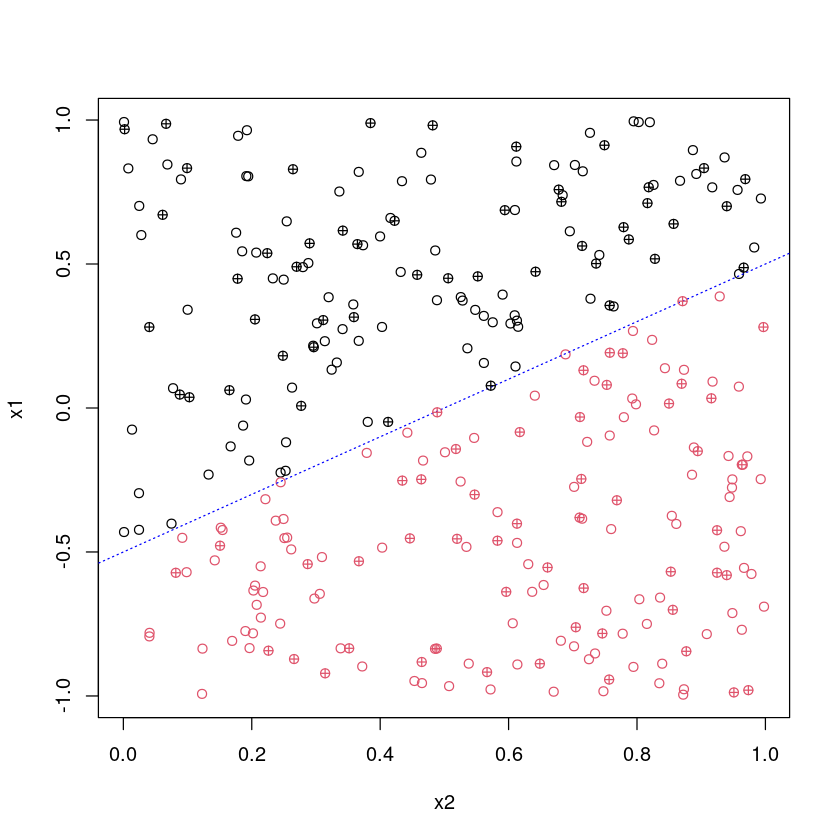

In [8]:
boundFunLin <- function(x1){
  x1 + 0.5
}

# Training set
gLin <- as.factor(x2 > boundFunLin(x1))
dataTrainLin <- data.frame(x1 = x1, x2 = x2, g = gLin)
plot(x2, x1, col=as.numeric(gLin))
lines(boundFunLin(t), t, col="blue", lty = "dotted")

# Test set
gLintest <- as.factor(x2test > boundFunLin(x1test))
dataTestLin <- data.frame(x1 = x1test, x2 = x2test, g = gLintest)
points(x2test, x1test, col=as.numeric(gLintest),pch=10)


## Linear SVM

We first use a linear kernel. 

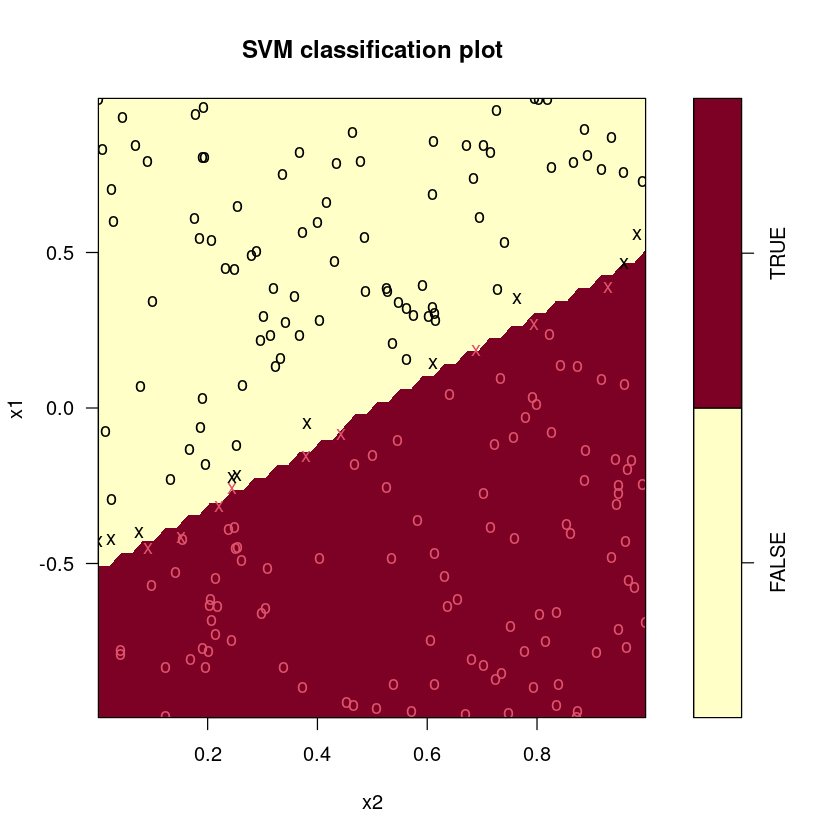

In [74]:
svm.model <- svm(g ~ ., data = dataTrainLin, type = "C", kernel = "lin", cross = 5, cost = 10)
plot(svm.model, data = dataTrainLin)

## pn augmente le nombre du cost (c) pour avoir seulement 3 vecteurs supports (croix)

In [75]:
summary(svm.model)


Call:
svm(formula = g ~ ., data = dataTrainLin, type = "C", kernel = "lin", 
    cross = 5, cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  19

 ( 10 9 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 99.5 
Single Accuracies:
 100 100 100 97.5 100 




**Q:** How many support vectors are there? How are they represented on the plot? 
What is their minimal number? Can you change the parameters, such that this minimal number is achieved?

Ils sont représentés par des croix, paramètre cost

**Q:** What are the `Single Accuracies` and the `Total Accuracy` in the `summary`? Why should we do some cross validation, even though there are no parameters to calibrate in the linear model?
- single accuracy : pourcentage de bons classements
- on fait ici de la validation croisée 
- les erreurs sont ici des erreurs de generalisation (precision calculée sur des données qui n'ont pas servi à l'apprentissage)

**Q:** Verify that the fitted values are equal to the sign of the decision values. 

In [58]:
# fonction unique enlève toutes les répétitions
# on regarde si les décisions values ont le meme signe que les fitted values 
# ici on a seulement true donc toutes les valeurs sont true 
unique((svm.model$decision.values<0) == (svm.model$fitted))

# il s'agit ici d'une vérification

,FALSE/TRUE
1,TRUE


Note that it is possible to get the normalized support vectors. 

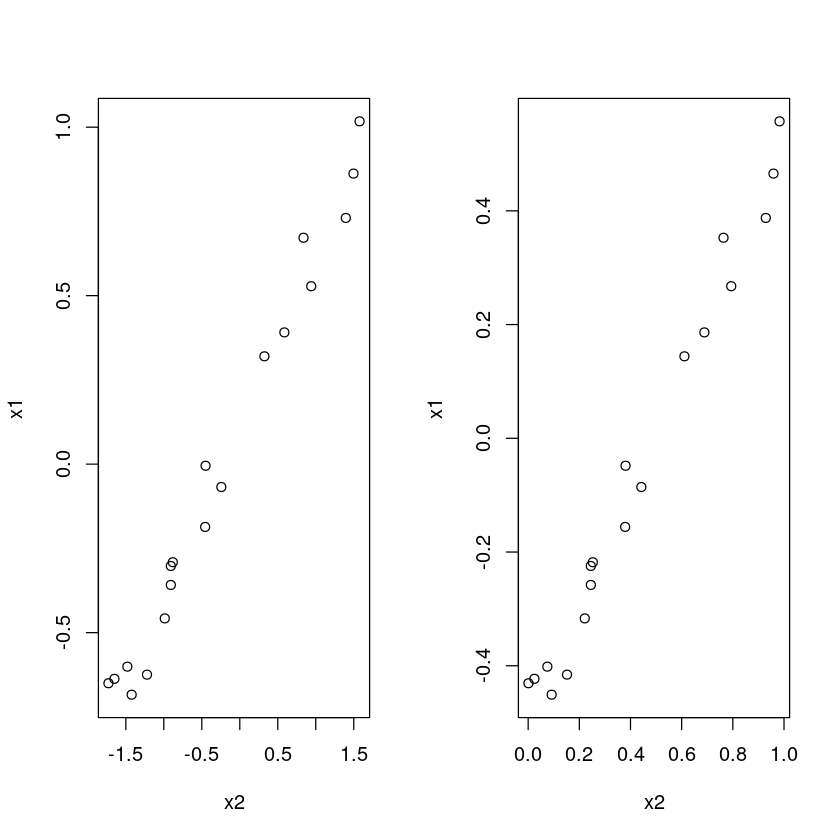

In [59]:
par(mfrow=c(1,2))
plot(x1~x2,data=svm.model$SV)
plot(x1~x2,data=dataTrainLin[svm.model$index,])

## Test set prediction

Let us now compute the contingency table and accuracy rate of `svm.model` on the test set. 

In [62]:
# Generalization error
pred.lin <- predict(svm.model,dataTestLin)
table(pred.lin,dataTestLin$g) 
paste("Generalization error: ",100*(1-sum(diag(table(pred.lin,dataTestLin$g)))/ntest),"%",sep="")

##nos donnéees ici sont parfaitement séparées donc c'est normal que le SVM linéaire marche ici

        
pred.lin FALSE TRUE
   FALSE    46    0
   TRUE      2   52

[1] "Generalization error: 2%"

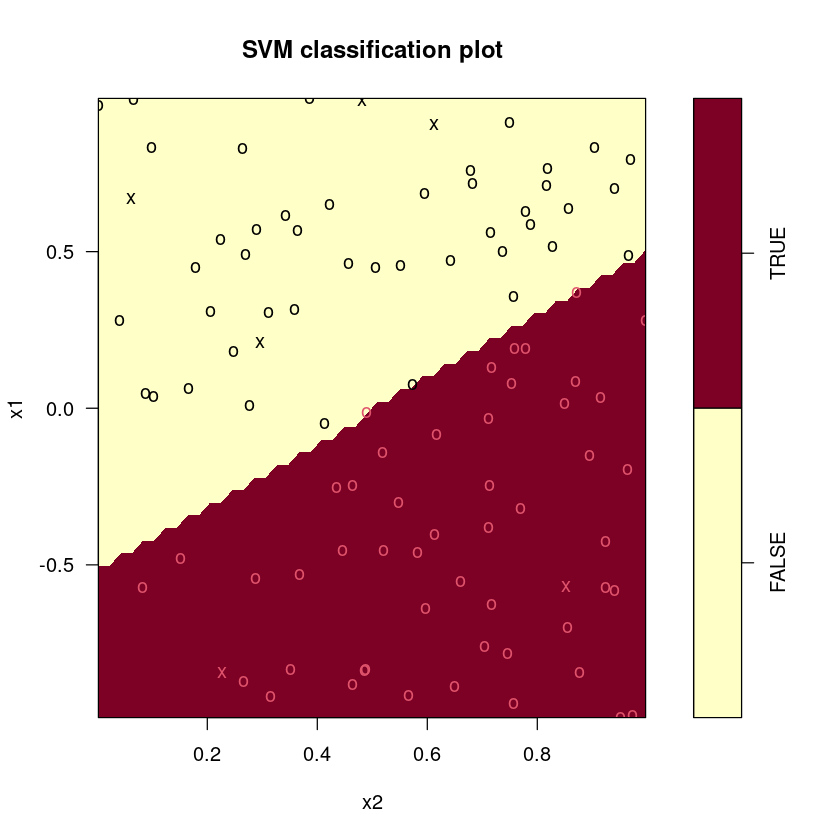

In [63]:
plot(svm.model,dataTestLin)

**Q:** Comment. 

# Cubic boundary

In this section, we assume that the points are separated by a cubic function (polynomial with degree 3). 

## Data simulation

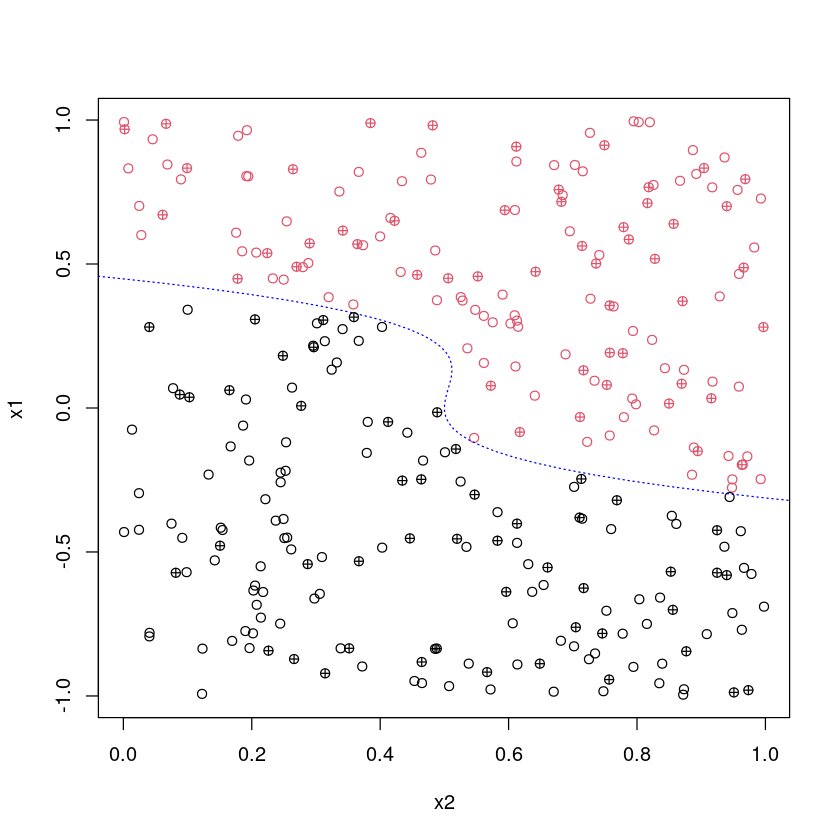

In [65]:
boundFunCub <- function(u){
  2*u^2 - 10*u^3 + 0.5
}

# Training set
gCub <- (x2 > boundFunCub(x1))
gCub <- as.factor(gCub)
dataTrainCub <- data.frame(x1 = x1, x2 = x2, g = gCub)
plot(x2, x1, col=as.numeric(gCub))
lines(boundFunCub(t), t, col="blue", lty = "dotted")

# Test set
gCubtest <- as.factor(x2test > boundFunCub(x1test))
dataTestCub <- data.frame(x1 = x1test, x2 = x2test, g = gCubtest)
points(x2test, x1test, col=as.numeric(gCubtest),pch=10)

## Linear SVM

With a linear kernel, we obtain the following.

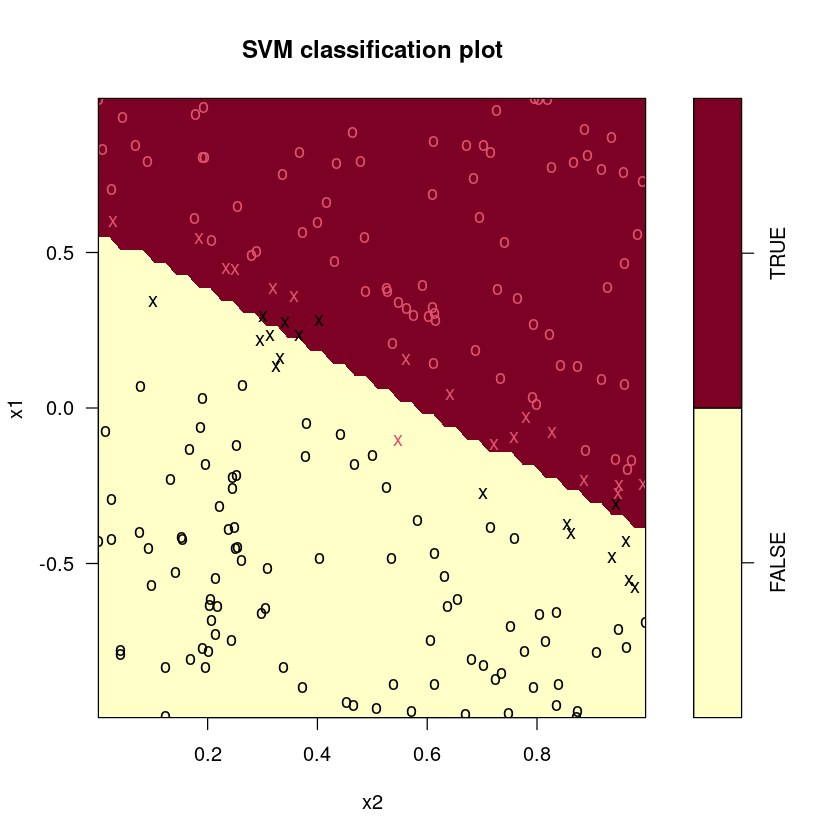

In [67]:
svm.Cub.lin <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "lin", cross = 5)
plot(svm.Cub.lin, data=dataTrainCub)

In [68]:
summary(svm.Cub.lin)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "lin", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  34

 ( 17 17 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 96.5 
Single Accuracies:
 95 97.5 97.5 95 97.5 




**Q:** What is the generalization error here? Comment. 

L'erreur de généralisation est de ~3.5%. C'est satisfaisant. 

## Polynomial SVM

Since we know here that the boundary is polynomial with degree 3, we can use a polynomial kernel.

### Polynomial kernel with default parameters

**Q:** What are the parameters of such kernel, and what is their default value?

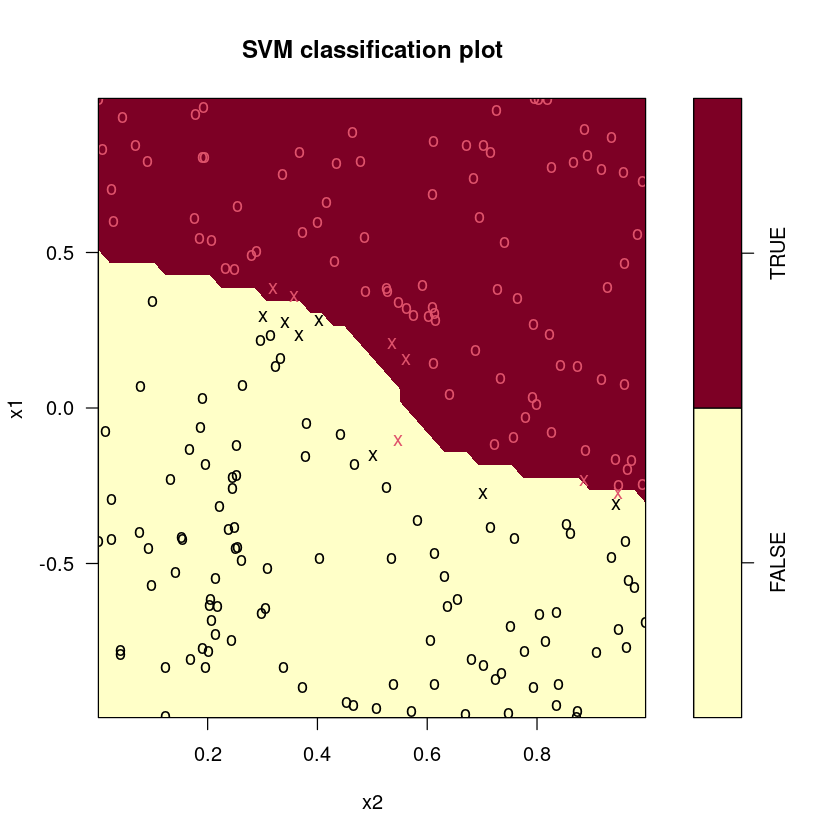

In [138]:
svm.Cub.poly.tune <- tune.svm(g ~ ., data = dataTrainCub, type = "C", kernel = "poly", coef0=-1:2, gamma = 0:3, cost=c(1,10,500,1000))
plot(svm.Cub.poly.tune$best.model, data = dataTrainCub)

In [139]:
summary(svm.Cub.poly.tune$best.model)


Call:
best.svm(x = g ~ ., data = dataTrainCub, gamma = 0:3, coef0 = -1:2, 
    cost = c(1, 10, 500, 1000), type = "C", kernel = "poly")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  1 

Number of Support Vectors:  14

 ( 7 7 )


Number of Classes:  2 

Levels: 
 FALSE TRUE




**Q:** Does this model seem reasonable? What should we do to improve it?

In order to study the training error, we can print the contingency table of the fitted values. 

In [140]:
table(svm.Cub.poly$fitted,dataTrainCub$g) # Il faudrait sur échantillon test !
paste("Training error: ",round(100*(1-sum(diag(table(svm.Cub.poly$fitted,dataTrainCub$g)))/nrow(dataTrainCub)),1),"%",sep="")

       
        FALSE TRUE
  FALSE   105    1
  TRUE      1   93

[1] "Training error: 1%"

**Q:** Comment.

### Tuned model

Since we know the degree in this example, we only tune the parameter `coef0`. 

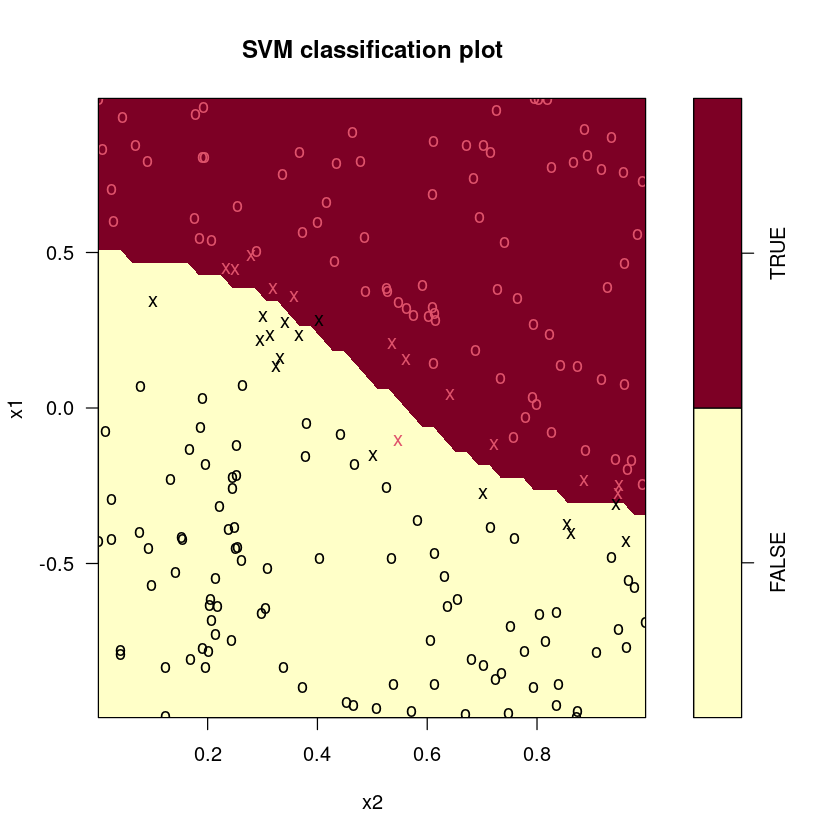

In [121]:
svm.Cub.poly.tune <- tune.svm(g ~ ., data = dataTrainCub, type = "C", kernel = "poly", coef0 = -5:5)
plot(svm.Cub.poly.tune$best.model, data = dataTrainCub)

In [141]:
# print(svm.Cub.poly.tune)
summary(svm.Cub.poly.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma coef0 cost
     2     1    1

- best performance: 0.015 

- Detailed performance results:
   gamma coef0 cost error dispersion
1      0    -1    1 0.470 0.12064641
2      1    -1    1 0.210 0.10488088
3      2    -1    1 0.255 0.06851602
4      3    -1    1 0.220 0.09486833
5      0     0    1 0.470 0.12064641
6      1     0    1 0.070 0.05868939
7      2     0    1 0.040 0.04594683
8      3     0    1 0.045 0.04972145
9      0     1    1 0.470 0.12064641
10     1     1    1 0.025 0.04249183
11     2     1    1 0.015 0.03374743
12     3     1    1 0.020 0.04216370
13     0     2    1 0.470 0.12064641
14     1     2    1 0.015 0.03374743
15     2     2    1 0.020 0.03496029
16     3     2    1 0.025 0.04859127
17     0    -1   10 0.470 0.12064641
18     1    -1   10 0.260 0.09067647
19     2    -1   10 0.255 0.06851602
20     3    -1   10 0.220 0.09486833
21     0     0   10 0.470 0.1206

**Q:** What value of `coef0` is obtained by cross validation? What is the generalization error in this case?

We can plot the generalization error (estimated by cross validation) w.r.t. `coef0`. 

In [142]:
#svm.Cub.poly.tune$best.parameters
plot(svm.Cub.poly.tune)

ERROR: Error in plot.tune(svm.Cub.poly.tune): Cannot visualize more than 2 parameters


**Q:** Which parameter minimizes the error?  

## Radial SVM 

### Radial kernel with default parameters

**Q:** What are the parameters of such kernel, and what is their default value?

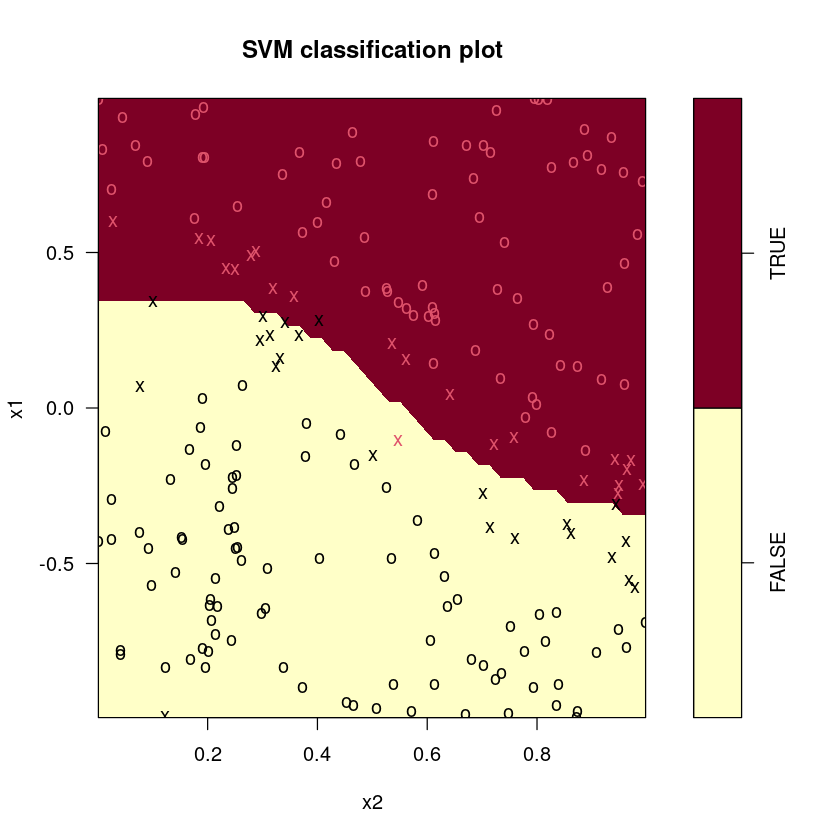

In [124]:
svm.Cub.rad <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "radial", cross = 5)
plot(svm.Cub.rad, data = dataTrainCub) 

In [143]:
summary(svm.Cub.rad)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "radial", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  44

 ( 22 22 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 96.5 
Single Accuracies:
 97.5 92.5 95 100 97.5 




**Q:** How much is the generalization error (estimated by cross validation) here? Does the model seem reasonable?

### Tuned model

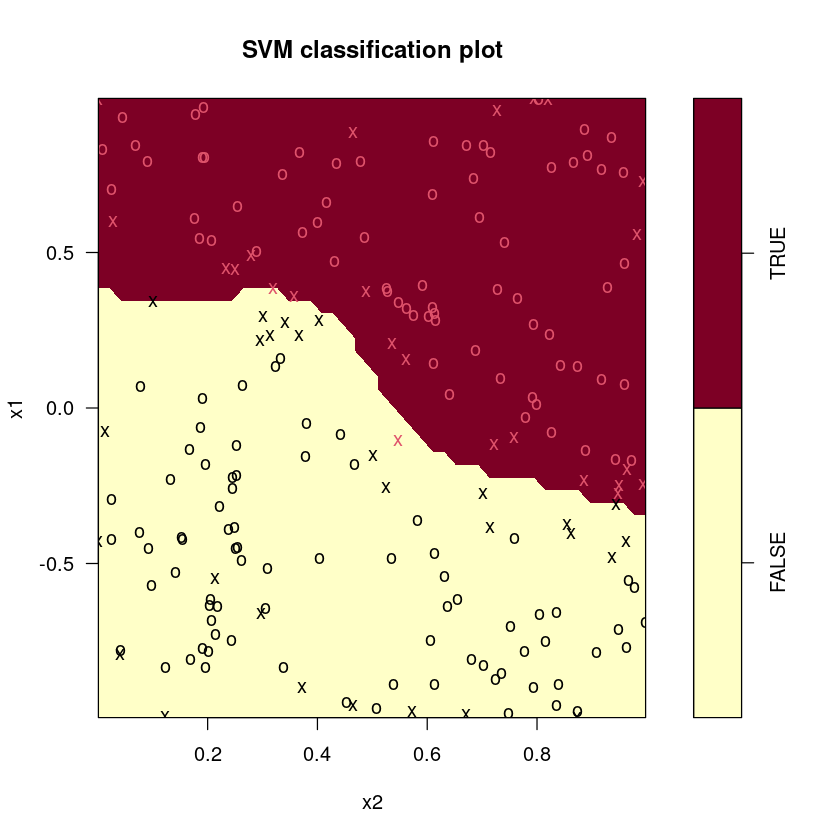

In [144]:
svm.Cub.rad.tune <- tune.svm(g ~ ., data = dataTrainCub, type = "C", kernel = "radial", gamma = seq(0.1, 2, by = 0.2))
plot(svm.Cub.rad.tune$best.model, data = dataTrainCub)

In [145]:
# print(svm.Cub.rad.tune)
summary(svm.Cub.rad.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma
   1.9

- best performance: 0.015 

- Detailed performance results:
   gamma error dispersion
1    0.1 0.050 0.03333333
2    0.3 0.035 0.03374743
3    0.5 0.035 0.03374743
4    0.7 0.025 0.03535534
5    0.9 0.020 0.03496029
6    1.1 0.020 0.03496029
7    1.3 0.020 0.03496029
8    1.5 0.020 0.03496029
9    1.7 0.020 0.03496029
10   1.9 0.015 0.03374743


 We can plot the estimated generalization error w.r.t. `gamma`. 

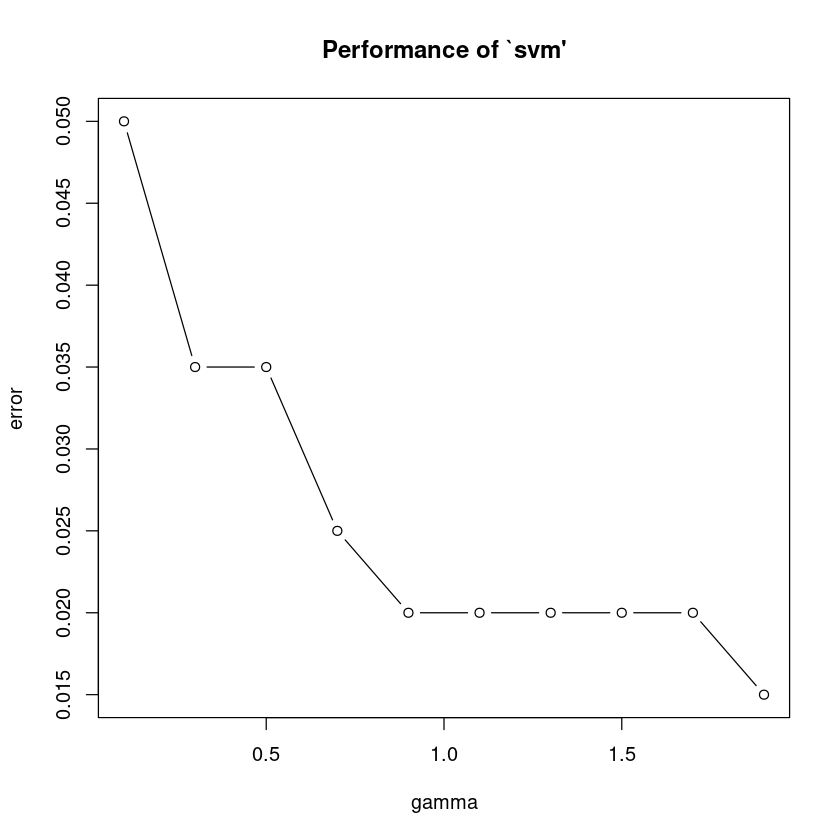

In [146]:
plot(svm.Cub.rad.tune)
# plot(error~gamma,data=svm.Cub.rad.tune$performances,type="b")
# svm.Cub.rad.tune$best.parameters

**Q:** Which parameter minimizes the error? What is the generalization error in that case? What is its values for the default parameter? 

## Model comparison

### Validation error (by cross validation)

Comparison of the cross-validation errors:

In [147]:
paste("Linear kernel:",100-svm.Cub.lin$tot.accuracy,"%",sep=" ")
paste("Default polynomial kernel:",100-svm.Cub.poly$tot.accuracy,"%",sep=" ")
paste("Tuned polynomial kernel:",100*(svm.Cub.poly.tune$best.performance),"%",sep=" ")
paste("Default radial kernel:",100-svm.Cub.rad$tot.accuracy,"%",sep=" ")
paste("Tuned radial kernel:",100*(svm.Cub.rad.tune$best.performance),"%",sep=" ")

[1] "Linear kernel: 3.5 %"

[1] "Default polynomial kernel: 3 %"

[1] "Tuned polynomial kernel: 1.5 %"

[1] "Default radial kernel: 3.5 %"

[1] "Tuned radial kernel: 1.5 %"

**Q:** Which model seems best?

### Test set prediction

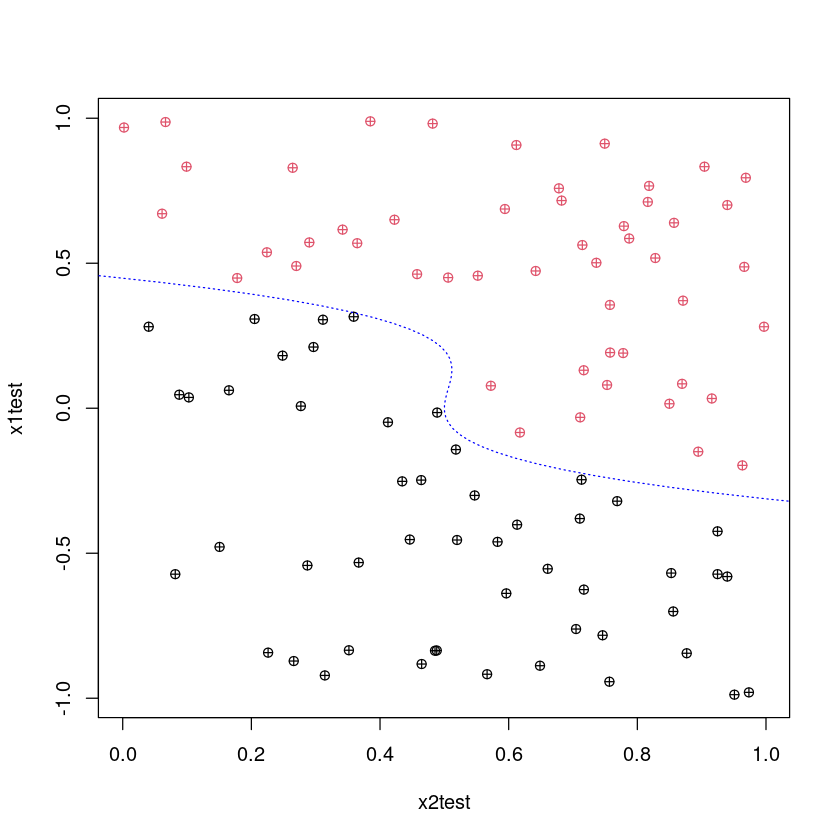

In [148]:
plot(x2test, x1test, col=as.numeric(gCubtest),pch=10)
lines(boundFunCub(t), t, col="blue", lty = "dotted")

            
pred.Cub.lin FALSE TRUE
       FALSE    48    1
       TRUE      2   49

[1] "Prediction error: 3 %"

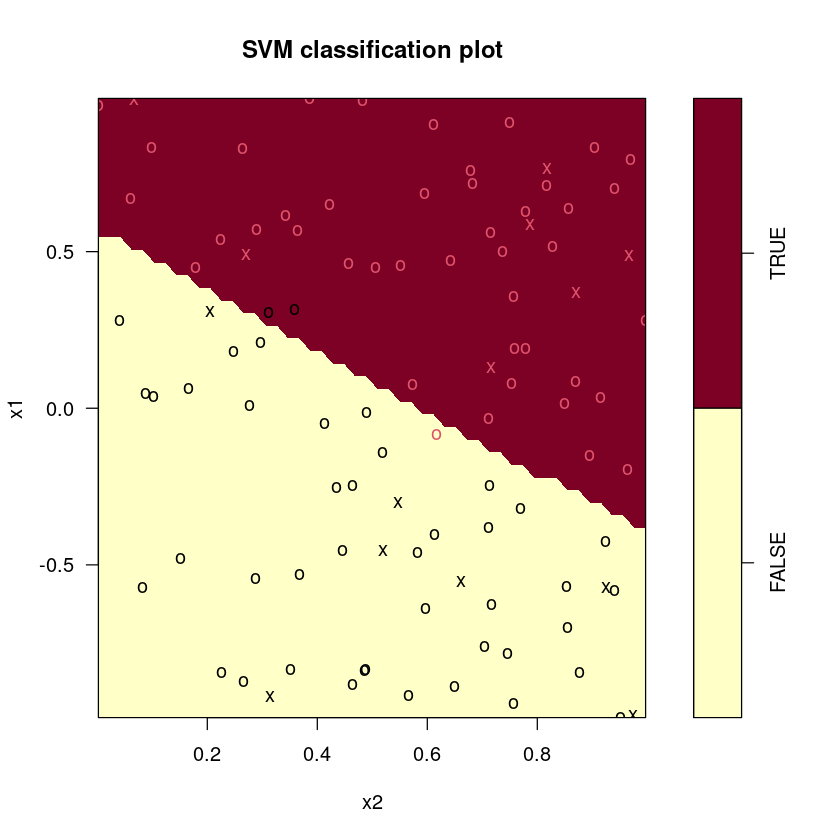

In [158]:
# Linear kernel
pred.Cub.lin <- predict(svm.Cub.lin,dataTestCub)
table(pred.Cub.lin,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.lin,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.lin,dataTestCub)

             
pred.Cub.poly FALSE TRUE
        FALSE    49    0
        TRUE      1   50

[1] "Prediction error: 1 %"

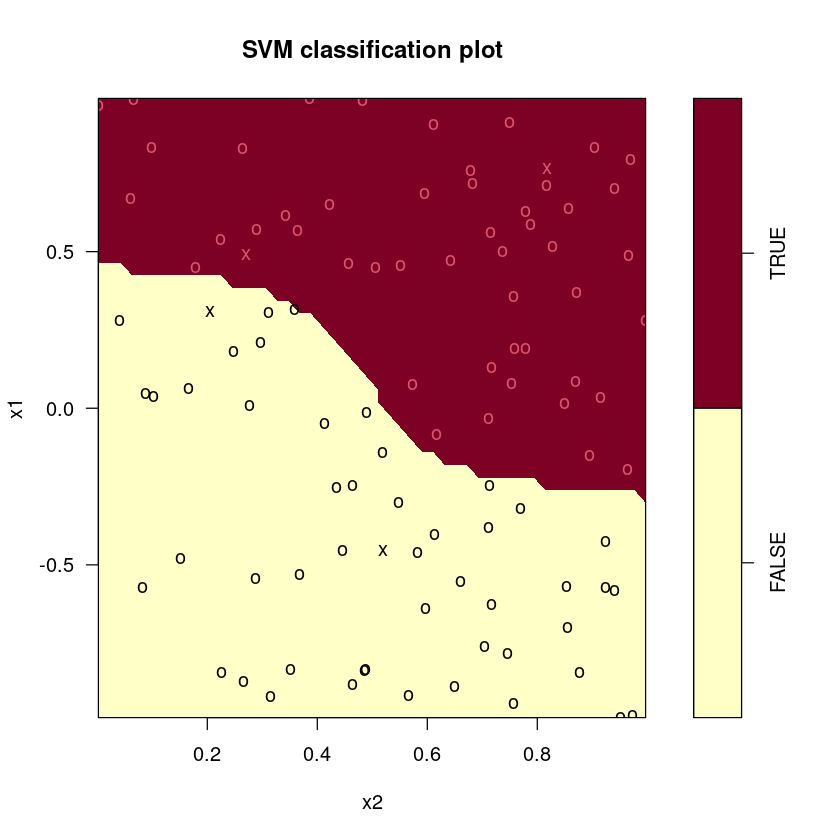

In [150]:
# Default polynomial kernel
pred.Cub.poly <- predict(svm.Cub.poly,dataTestCub)
table(pred.Cub.poly,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.poly,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.poly,dataTestCub)

                  
pred.Cub.poly.tune FALSE TRUE
             FALSE    49    0
             TRUE      1   50

[1] "Prediction error: 1 %"

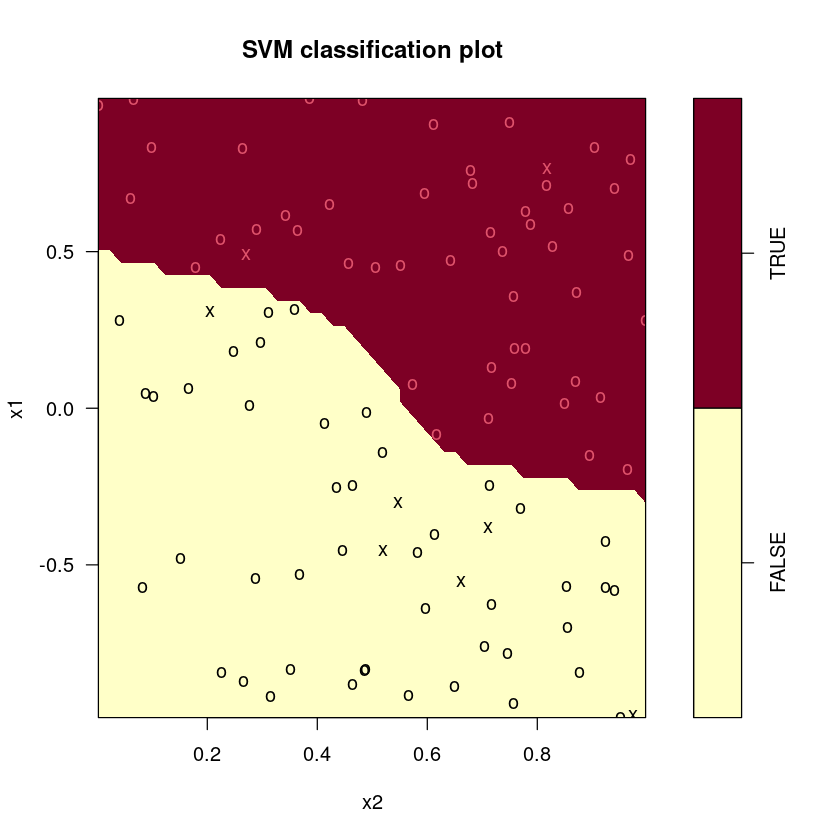

In [151]:
# Tuned polynomial kernel
pred.Cub.poly.tune <- predict(svm.Cub.poly.tune$best.model,dataTestCub)
table(pred.Cub.poly.tune,dataTestCub$g) 
paste("Prediction error: ",100*(1-sum(diag(table(pred.Cub.poly.tune,dataTestCub$g)))/ntest)," %",sep="")
plot(svm.Cub.poly.tune$best.model,dataTestCub)

            
pred.Cub.rad FALSE TRUE
       FALSE    48    0
       TRUE      2   50

[1] "Prediction error: 2 %"

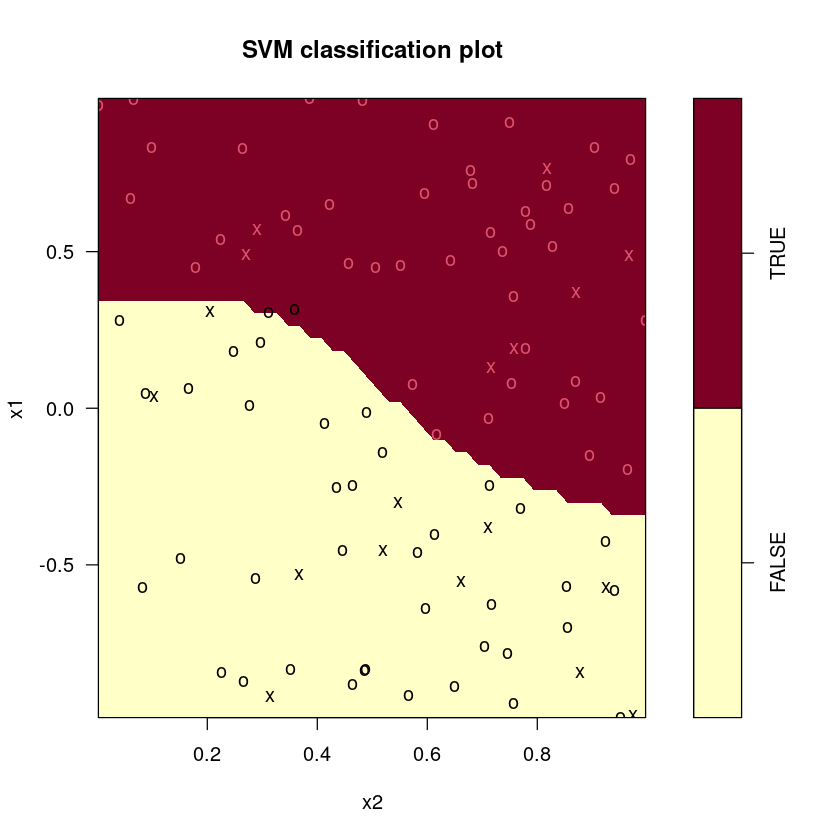

In [152]:
# Default radial kernel
pred.Cub.rad <- predict(svm.Cub.rad,dataTestCub)
table(pred.Cub.rad,dataTestCub$g) 
paste("Prediction error: ",100*(1-sum(diag(table(pred.Cub.rad,dataTestCub$g)))/ntest)," %",sep="")
plot(svm.Cub.rad,dataTestCub)

                 
pred.Cub.rad.tune FALSE TRUE
            FALSE    50    0
            TRUE      0   50

[1] "Prediction error: 0 %"

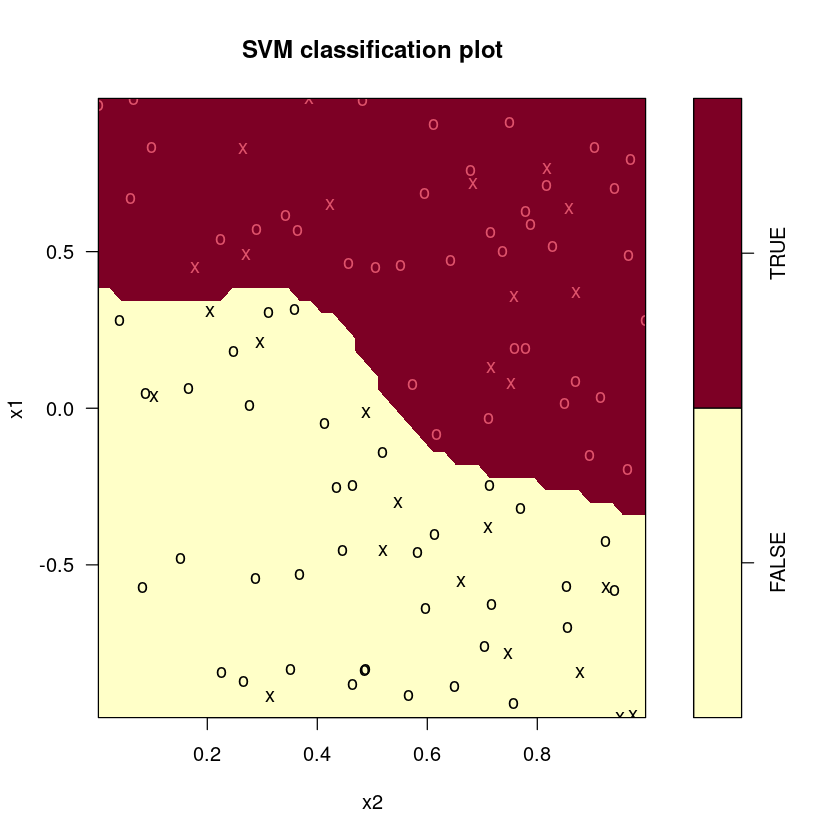

In [159]:
# Tuned radial kernel
pred.Cub.rad.tune <- predict(svm.Cub.rad.tune$best.model,dataTestCub)
table(pred.Cub.rad.tune,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.rad.tune,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.rad.tune$best.model,dataTestCub)

In [160]:
# Prediction accuracies
paste("Linear kernel:",round(100*(1-sum(diag(table(pred.Cub.lin,dataTestCub$g)))/ntest),1),"%",sep=" ")
paste("Default polynomial kernel:",round(100*(1-sum(diag(table(pred.Cub.poly,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Tuned polynomial kernel:",round(100*(1-sum(diag(table(pred.Cub.poly.tune,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Default radial kernel:",round(100*(1-sum(diag(table(pred.Cub.rad,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Tuned radial kernel:",round(100*(1-sum(diag(table(pred.Cub.rad.tune,dataTestCub$g)))/ntest)),"%",sep=" ")

[1] "Linear kernel: 3 %"

[1] "Default polynomial kernel: 1 %"

[1] "Tuned polynomial kernel: 1 %"

[1] "Default radial kernel: 2 %"

[1] "Tuned radial kernel: 0 %"

**Q:** Conclude. 

# Absolute value boundary

In this section, we assume that the points are separated by an absolute value function. 

## Data simulation

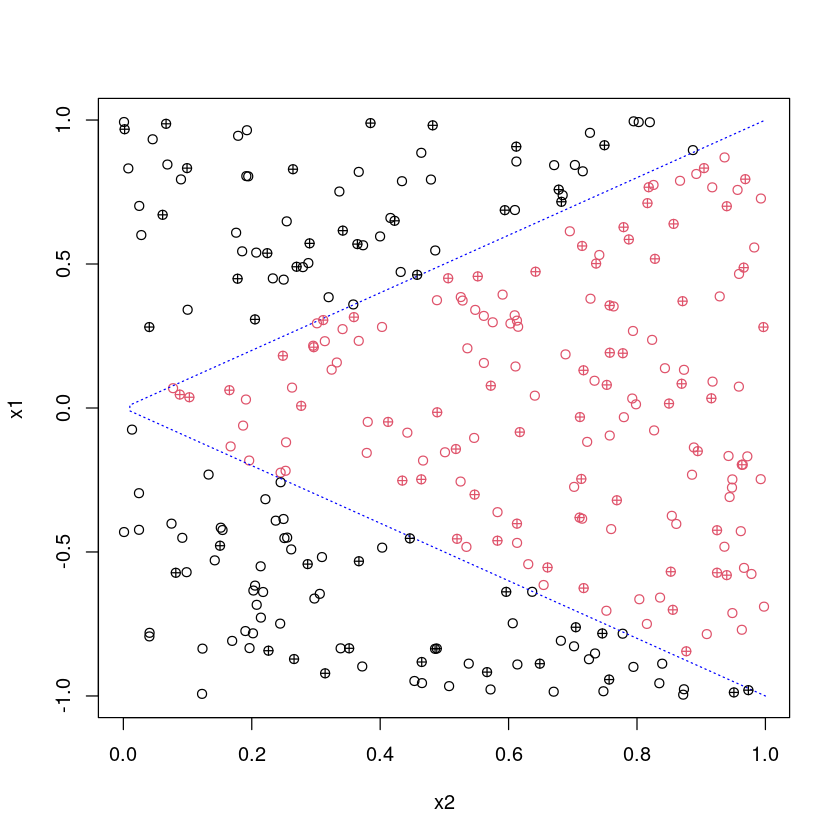

In [206]:
boundFunAbs <- function(x1){
  abs(x1)
}

# Training set
gAbs <- (x2 > boundFunAbs(x1))
gAbs <- as.factor(gAbs)
dataTrainAbs <- data.frame(x1 = x1, x2 = x2, g = gAbs)
plot(x2, x1, col=as.numeric(gAbs))
lines(boundFunAbs(t), t, col="blue", lty = "dotted")

# Test set
gAbstest <- as.factor(x2test > boundFunAbs(x1test))
dataTestAbs <- data.frame(x1 = x1test, x2 = x2test, g = gAbstest)
points(x2test, x1test, col=as.numeric(gAbstest),pch=10)

## Radial SVM

### Radial kernel with default parameters

**Q:** Train a first SVM classifier `svm.Abs.rad` based on a radial kernel with default parameters. 

### Radial kernel with `cost=1000`

**Q:** Train a second SVM classifier `svm.Abs.rad.cost1000` based on a radial kernel with default parameters, with `cost=1000`. What can you observe? 
What is the effect of the cost w.r.t. overfitting?

### Tuned radial model

**Q:** Tune a third model `svm.Abs.rad.tune` based on a radial kernel by cross validation. The parameters can be taken in the following grids: 
- `gamma = seq(0.1, 2, by = 0.2)`, 
- `cost = c(1, 25, 50, 75, 100, 150, 200)`. 


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.7   50

- best performance: 0.015 

- Detailed performance results:
   gamma cost error dispersion
1    0.1    1 0.115 0.05296750
2    0.3    1 0.060 0.04594683
3    0.5    1 0.020 0.03496029
4    0.7    1 0.020 0.03496029
5    0.9    1 0.030 0.04830459
6    1.1    1 0.025 0.04859127
7    1.3    1 0.025 0.04859127
8    1.5    1 0.025 0.04859127
9    1.7    1 0.025 0.04859127
10   1.9    1 0.025 0.04859127
11   0.1   25 0.040 0.06146363
12   0.3   25 0.040 0.05163978
13   0.5   25 0.040 0.04594683
14   0.7   25 0.025 0.04859127
15   0.9   25 0.030 0.04830459
16   1.1   25 0.025 0.03535534
17   1.3   25 0.030 0.03496029
18   1.5   25 0.030 0.03496029
19   1.7   25 0.035 0.03374743
20   1.9   25 0.035 0.03374743
21   0.1   50 0.040 0.04594683
22   0.3   50 0.025 0.04859127
23   0.5   50 0.025 0.04859127
24   0.7   50 0.015 0.03374743
25   0.9   50 0.020 0.03496029
26   1.1   50 0

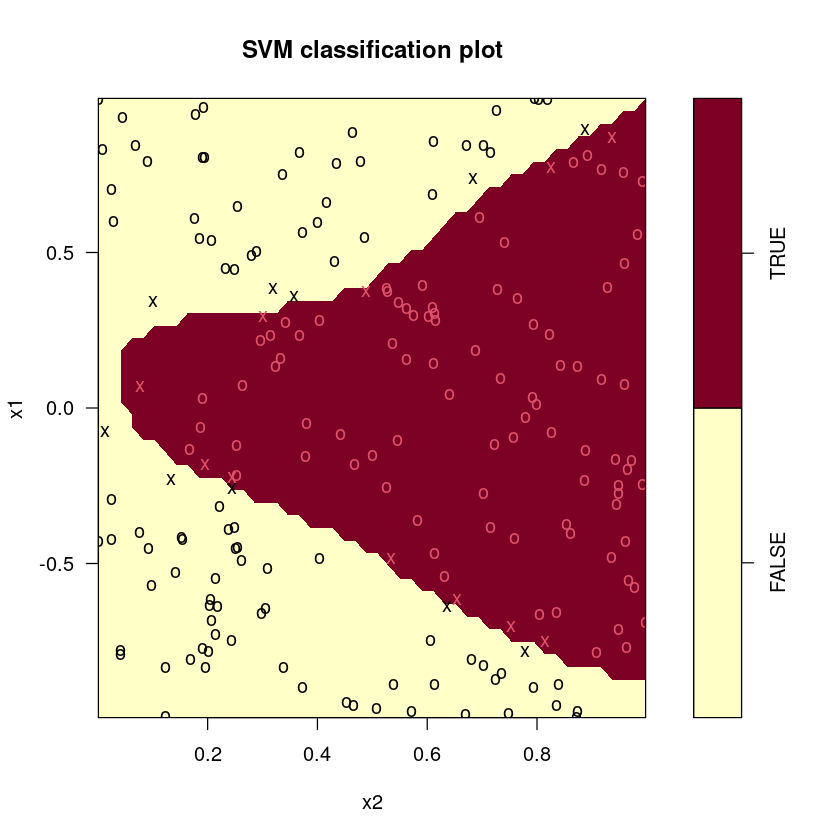

In [207]:
svm.Abs.rad.tune <- tune.svm(g ~ ., data = dataTrainAbs, type = "C", kernel = "rad", gamma = seq(0.1, 2, by = 0.2), cost = c(1, 25, 50, 75, 100, 150, 200))
plot(svm.Abs.rad.tune$best.model, data = dataTrainAbs)
summary(svm.Abs.rad.tune)

Warning message in title(...):
“"data" n'est pas un paramètre graphique”


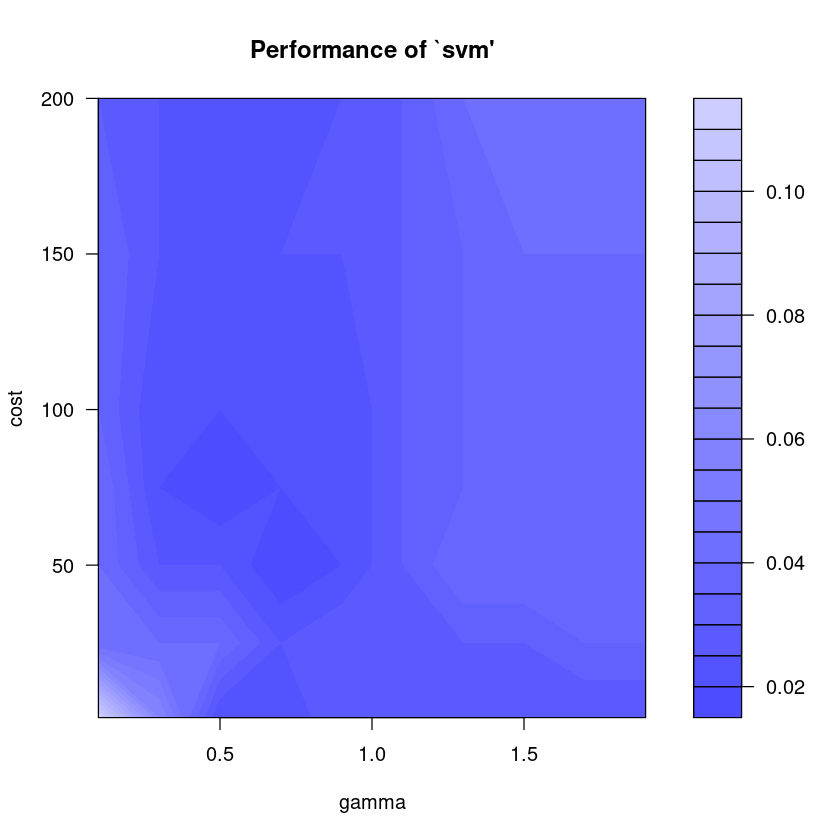

In [209]:
plot(svm.Abs.rad.tune, data = dataTrainAbs)

In [208]:
pred.Abs.rad.tune <- predict(svm.Abs.rad.tune$best.model,dataTestAbs)
table(pred.Abs.rad.tune,dataTestAbs$g)
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Abs.rad.tune,dataTestAbs$g)))/ntest),1)," %",sep="")

                 
pred.Abs.rad.tune FALSE TRUE
            FALSE    41    1
            TRUE      1   57

[1] "Prediction error: 2 %"

**Q:** For which parameters is the generalization error the smallest? What is its value in that case? 

In [190]:
summary(svm.Cub.rad.tune$best.model)


Call:
best.svm(x = g ~ ., data = dataTrainCub, gamma = seq(0.1, 2, by = 0.2), 
    cost = c(1, 25, 50, 75, 100, 150, 200), type = "C", kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  50 

Number of Support Vectors:  15

 ( 7 8 )


Number of Classes:  2 

Levels: 
 FALSE TRUE




**Q:** Plot the generalization error w.r.t `gamma` and `cost`. What do you observe?

## Test set prediction

**Q:** Compare the three radial models `svm.Abs.rad`, `svm.Abs.rad.tune.cost1000` and `svm.Abs.rad.tune` on the test set (in terms of contingency table and generalization error). Comment. 

# Sine boundary

## Data simulation

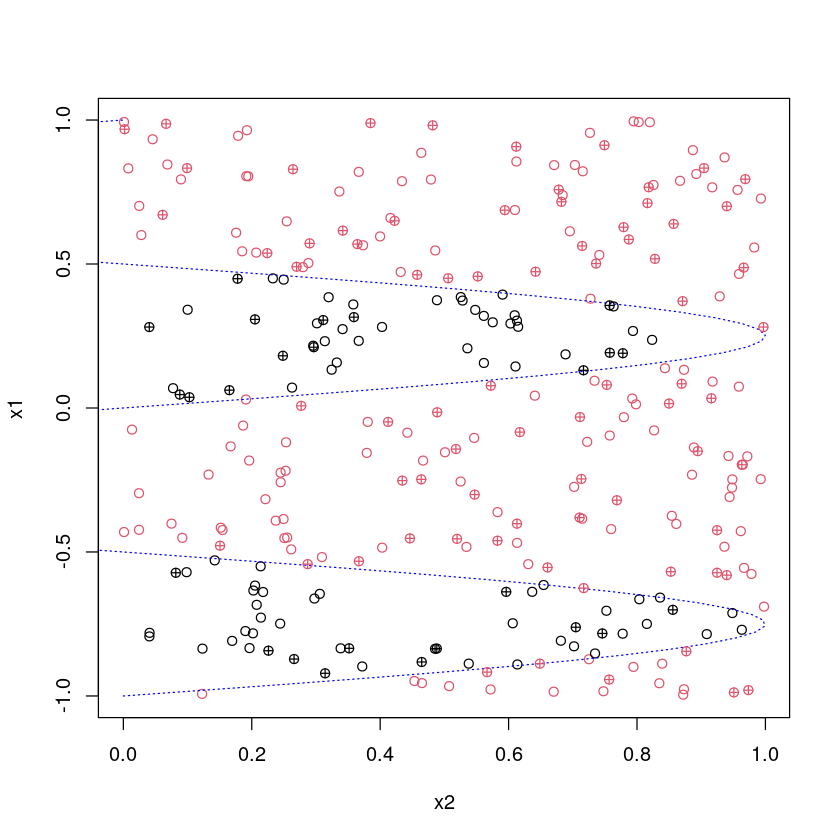

In [210]:
boundFunSin <- function(x1){
  sin(2*pi*x1)
}

# Training set
gSin <- (x2 > boundFunSin(x1))
gSin <- as.factor(gSin)
dataTrainSin <- data.frame(x1 = x1, x2 = x2, g = gSin)
plot(x2, x1, col=as.numeric(gSin))
lines(boundFunSin(t), t, col="blue", lty = "dotted")

# Test set
gSintest <- as.factor(x2test > boundFunSin(x1test))
dataTestSin <- data.frame(x1 = x1test, x2 = x2test, g = gSintest)
points(x2test, x1test, col=as.numeric(gSintest),pch=10)


**Q:** Same questions as for the Absolute value boundary case (with radial kernels). 

## Radial SVM

### Default parameters

### With `cost=1000`

### Tuned model

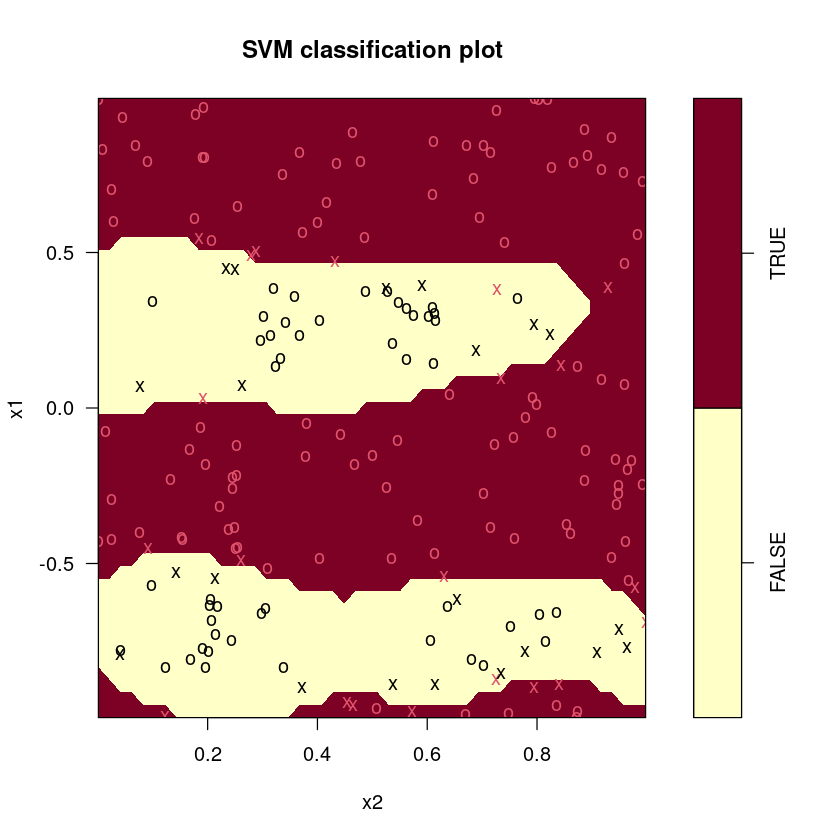

In [212]:
svm.Abs.rad.tune <- tune.svm(g ~ ., data = dataTrainSin, type = "C", kernel = "radial", cross = 5, gamma = seq(0.1, 2, by = 0.2), cost = c(1, 25, 50, 75, 100, 150, 200))
plot(svm.Abs.rad.tune$best.model, data = dataTrainSin)

## Model comparison

### Validation error (by cross validation)

### Test set prediction

# Disk boundary

## Data simulation

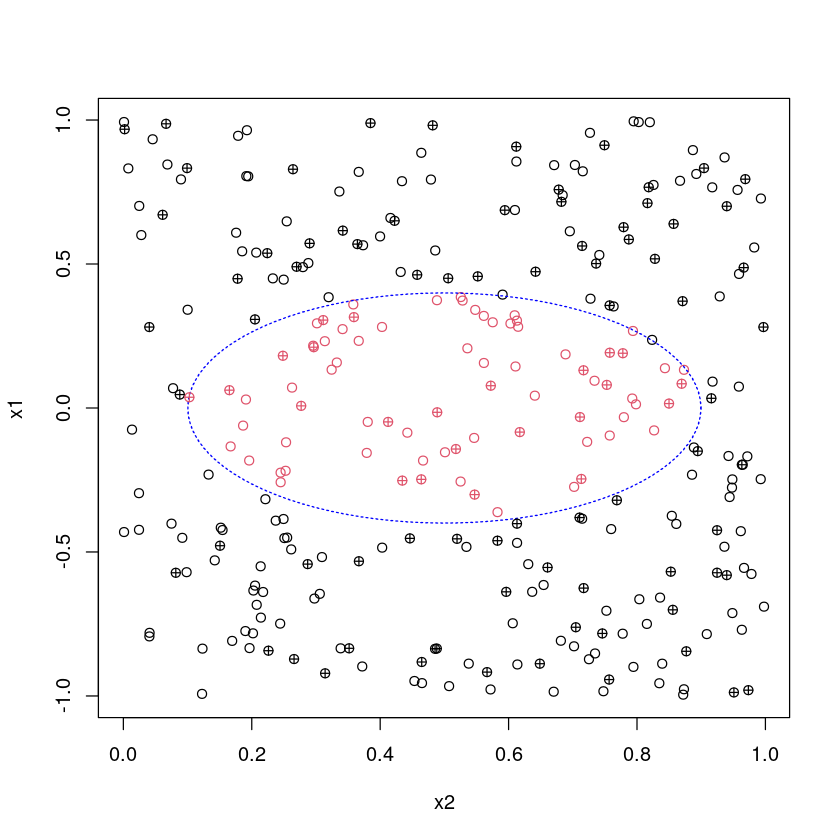

In [157]:
boundFunDisk <- function(x1, x2){
   x1^2 + (x2 - 1/2)^2
}
r <- 0.4

# Training set
gDisk <- as.factor(boundFunDisk(x1, x2) < r^2)
dataTrainDisk <- data.frame(x1 = x1, x2 = x2, g = gDisk)
plot(x2, x1, col=as.numeric(gDisk))
lines(1/2 + r * cos(2*pi*t), r * sin(2*pi*t), col="blue", lty = "dotted")

# Test set
gDisktest <- as.factor(boundFunDisk(x1test, x2test) < r^2)
dataTestDisk <- data.frame(x1 = x1test, x2 = x2test, g = gDisktest)
points(x2test, x1test, col=as.numeric(gDisktest),pch=10)


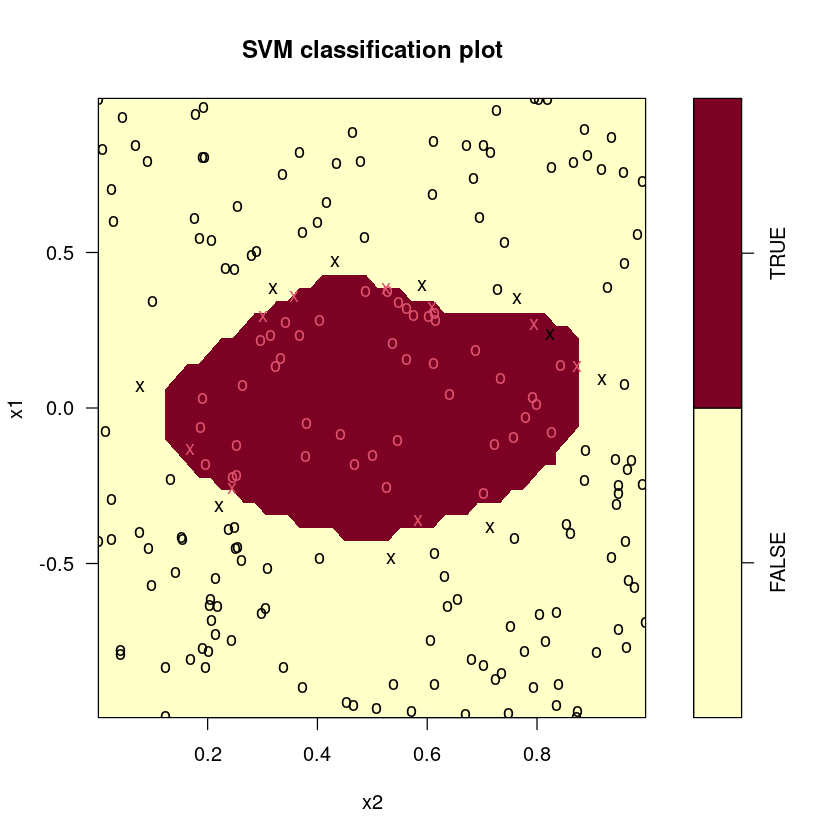

In [214]:
svm.Disk.rad.tune <- tune.svm(g ~ ., data = dataTrainDisk, type = "C", kernel = "radial", cross = 5, gamma = seq(0.1, 2, by = 0.2), cost = c(1, 25, 50, 75, 100, 150, 200))
plot(svm.Disk.rad.tune$best.model, data = dataTrainDisk)

**Q:** Same questions as for the Absolute value boundary case (with polynomial and radial kernels). 

## Polynomial SVM

### Default parameters

### Tuned model

## Radial SVM 

### Default parameters

### Tuned model

## Model comparison

### Validation error (by cross validation)

### Test set prediction